In [298]:
import pandas as pd

In [299]:
df2 = pd.read_csv('startup2.csv')

In [300]:
df2.head()

,Unnamed: 0,name,description,founded_date,category_list,total_funding_amout
0,0,500px,We're the premier community for inspiring phot...,"Founded: October 10, 2009","App,Mobile,Photographers,Photos,Web,Photograph...",22325000
1,0,Canva,Amazingly simple graphic design. Canva makes g...,"Founded: January 01, 2012","Web Design,Simple,Graphic Design,Design,Tool,P...",49555000
2,0,Duolingo,Free language education for the world. Accordi...,"Founded: November 01, 2011","E-Learning,Education,Internet,Language Learning",108300000
3,0,Coursera,Coursera - We are a social entrepreneurship co...,"Founded: January 01, 2012","Edtech,Education,Enterprise,Internet",210100000
4,0,Giphy,Animated GIF search. The first and largest GIF...,"Founded: February 01, 2013","Internet,Photo Sharing,Search Engine",150949998


## Dropping missing values and inconsistent column

In [301]:
df2.dropna(inplace=True)

In [302]:
df2.drop(columns='Unnamed: 0',inplace=True)

## Cleaning fouded_date to get the year only

In [303]:
'The founded_date type is mixed between list and float so we should convert it before cleaning into string'

'The founded_date type is mixed between list and float so we should convert it before cleaning into string'

In [304]:
df2.founded_date = df2.founded_date.astype(str)

In [305]:
def get_year(dt):
    year = dt.split(',')[1].strip()
    return year

In [306]:
df2['founded_date'] = df2.founded_date.apply(get_year) 

## Rename column total_funding_amout

In [307]:
df2.rename(columns={'total_funding_amout':'total_funding_amount'},inplace=True)

## Analysis Top 10 startups in E-learning and education field

In [308]:
def validate_elearning(df):
    if(('E-Learning' in df.category_list) or ('Education' in df.category_list) or ('Edtech' in df.category_list)):
        return True
    else:
        return False

df3 = df2[df2[['category_list']].apply(lambda x:validate_elearning(x),axis=1)].sort_index()

In [309]:
df3.head(10)

,name,description,founded_date,category_list,total_funding_amount
2,Duolingo,Free language education for the world. Accordi...,2011,"E-Learning,Education,Internet,Language Learning",108300000
3,Coursera,Coursera - We are a social entrepreneurship co...,2012,"Edtech,Education,Enterprise,Internet",210100000
17,Skillshare,Skillshare is a global community where you can...,2010,"Skills,Online Learning,Social Community,Web,E-...",22750168
23,TradingView,"TradingView is not just an awesome tool, it’s ...",2011,"Android,Cloud Computing,Education,Finance,Inte...",3752500
25,Pearltrees,Pearltrees is the social curation community. I...,2009,"Curation,Community,Social,Education,Enterprise...",10400000
31,Teachable,"Teachable is a multi-tenant, unbranded online ...",2013,"Courses,E-Learning,Education,Online Portals,Ma...",8580000
32,Babbel,Interactive online courses on the web and as m...,2007,"Courses,Online,Free,Web App,Mobile App,Apps,Ed...",33300000
33,Treehouse,Treehouse aims to be the best way to learn web...,2011,"Businesses,Coding,Development,Learning,Web Des...",28350000
58,DataCamp,DataCamp - Become a data expert now. DataCamp ...,2013,"Data Experts,Training,Online Education,Analyti...",6140000
71,Thinkific,Thinkific is a turn-key online course platform...,2012,"Education,Learning,Educational,Instructors,Pla...",0


In [310]:
indexNumbers = df3[df3['total_funding_amount']==0].index
df3.drop(indexNumbers , inplace=True)

In [311]:
df3

,name,description,founded_date,category_list,total_funding_amount
2,Duolingo,Free language education for the world. Accordi...,2011,"E-Learning,Education,Internet,Language Learning",108300000
3,Coursera,Coursera - We are a social entrepreneurship co...,2012,"Edtech,Education,Enterprise,Internet",210100000
17,Skillshare,Skillshare is a global community where you can...,2010,"Skills,Online Learning,Social Community,Web,E-...",22750168
23,TradingView,"TradingView is not just an awesome tool, it’s ...",2011,"Android,Cloud Computing,Education,Finance,Inte...",3752500
25,Pearltrees,Pearltrees is the social curation community. I...,2009,"Curation,Community,Social,Education,Enterprise...",10400000
31,Teachable,"Teachable is a multi-tenant, unbranded online ...",2013,"Courses,E-Learning,Education,Online Portals,Ma...",8580000
32,Babbel,Interactive online courses on the web and as m...,2007,"Courses,Online,Free,Web App,Mobile App,Apps,Ed...",33300000
33,Treehouse,Treehouse aims to be the best way to learn web...,2011,"Businesses,Coding,Development,Learning,Web Des...",28350000
58,DataCamp,DataCamp - Become a data expert now. DataCamp ...,2013,"Data Experts,Training,Online Education,Analyti...",6140000
98,Plotly,"Plotly - It is a free, online, graphing, curve...",2013,"Online,Free,Infographic,Analytics,Big Data,Col...",10113948


Text(0.48, 1.05, 'TP 10 leader startups in E-learning and Education field')

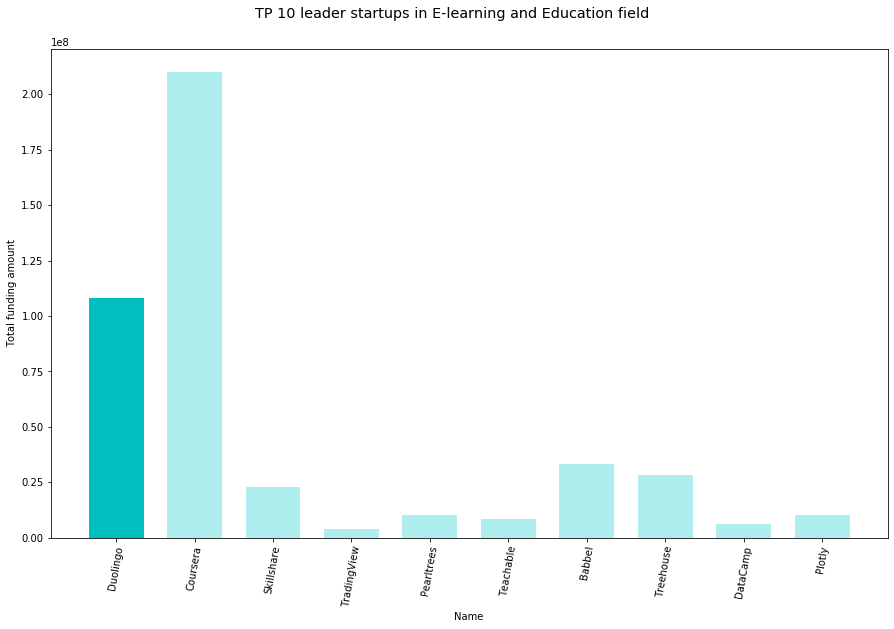

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df4 = df3.head(10)
plt.rcParams['figure.figsize'] = 15,9
height = df4['total_funding_amount']
bars =  df4['name']
y_pos = np.arange(len(bars))


plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=80)
plt.ylabel('Total funding amount')
plt.xlabel('Name')
plt.title("TP 10 leader startups in E-learning and Education field", fontdict=None, position= [0.48,1.05], size = 'x-large')

